# Lab 4/ Spotify data set😜😜😜😜

Minakov Nikita, csse 1707DA

@minakov.nv

In [5]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import pandas as pd
import nsfg
import first
import thinkstats2
import thinkplot

import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from scipy import stats

In [3]:
db_read = pd.read_csv('SpotifyFeatures.csv', delimiter = ',')

Pop_db = db_read[db_read['genre'] == 'Pop']
Jazz_db = db_read[db_read['genre'] == 'Jazz']

And compute the distribution of popularity for Pop and Jazz.

In [4]:
Pop_pl = Pop_db.popularity
Pop_pl_dropna = Pop_pl.dropna()
print('Pop music:', len(Pop_pl),' <-> ',  len(Pop_pl_dropna))

Jazz_pl = Jazz_db.popularity
Jazz_pl_dropna = Jazz_pl.dropna()
print('Jazz music:', len(Jazz_pl),' <-> ',  len(Jazz_pl_dropna))

Pop music: 9386  <->  9386
Jazz music: 9441  <->  9441


We can plot the PMFs on the same scale, but it is hard to see if there is a difference.

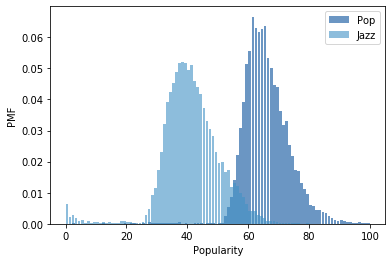

In [7]:
Pop_pmf = thinkstats2.Pmf(Pop_pl_dropna, label='Pop')
Jazz_pmf = thinkstats2.Pmf(Jazz_pl_dropna, label='Jazz')

thinkplot.PrePlot(2)
thinkplot.Hist(Pop_pmf, align='right')
thinkplot.Hist(Jazz_pmf, align='left')
thinkplot.Config(xlabel='Popularity', ylabel='PMF')

Here we can see bell shape graphs. They show us that Pop music is much popular that Jazz. Also between 50 and 60 they have +- same pmf

Pmf propability for pop and jazz. Pop is much popular.

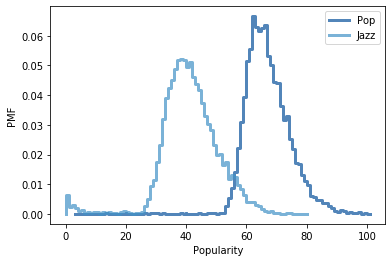

In [8]:
thinkplot.PrePlot(2)
thinkplot.Pmf(Pop_pmf, align='Pop')
thinkplot.Pmf(Jazz_pmf, align='Jazz')
thinkplot.Config(xlabel='Popularity', ylabel='PMF')

Text(0, 0.5, 'Density')

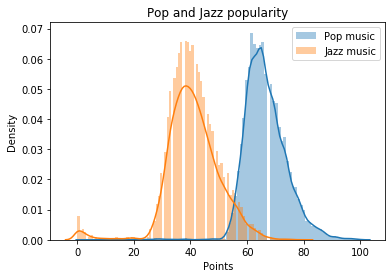

In [13]:
popPlot = sns.distplot(Pop_pl_dropna, bins = 100, label="Pop music")
jazzPlot = sns.distplot(Jazz_pl_dropna, bins = 100, label="Jazz music")

plt.legend()
plt.title('Pop and Jazz popularity')
plt.xlabel('Points')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

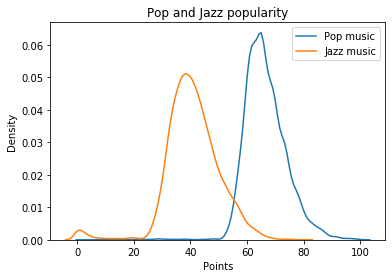

In [12]:
popPlot = sns.distplot(Pop_pl_dropna,hist=False, bins = 100, label="Pop music")
jazzPlot = sns.distplot(Jazz_pl_dropna,hist=False, bins = 100, label="Jazz music")

plt.legend()
plt.title('Pop and Jazz popularity')
plt.xlabel('Points')
plt.ylabel('Density')

Hist and kde graphs using seaborn.
They are the same as with thinkstat.

The distribution of popularity for Pop and Jazz.

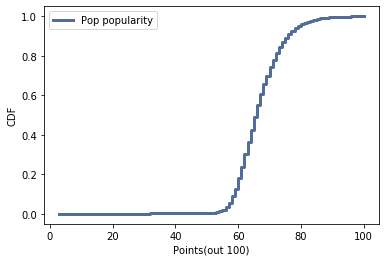

In [19]:
pop_cdf = thinkstats2.Cdf(Pop_db.popularity, label='Pop popularity')
thinkplot.Cdf(pop_cdf)
thinkplot.Config(xlabel='Points(out 100)', ylabel='CDF')

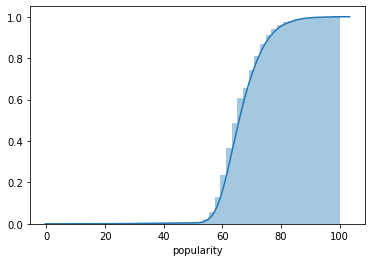

In [14]:
sns.distplot(Pop_db.popularity,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

As we can see from this plot propability to see pop music up to 80th popularity is much bigger. Hists built using 2 libraries are the same.

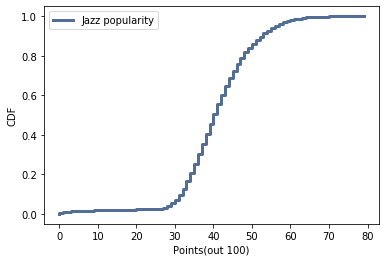

In [42]:
jazz_cdf = thinkstats2.Cdf(Jazz_db.popularity, label='Jazz popularity')
thinkplot.Cdf(jazz_cdf)
thinkplot.Config(xlabel='Points(out 100)', ylabel='CDF')

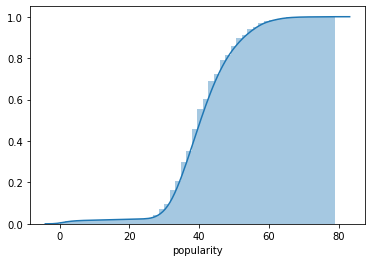

In [15]:
sns.distplot(Jazz_db.popularity,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

As we can see from this plot propability to see jazz music up to 50th popularity is much bigger and ends with 80.

`Cdf` provides `Prob`, which evaluates the CDF; that is, it computes the fraction of values less than or equal to the given value.

In [51]:
pop_cdf.Prob(77)

0.9264862561261453

In [52]:
jazz_cdf.Prob(77)

0.9998940790170533

`Value` evaluates the inverse CDF; given a fraction, it computes the corresponding value.

In [53]:
pop_cdf.Value(0.5)

66

In [54]:
jazz_cdf.Value(0.5)

40

In general, CDFs are a good way to visualize distributions.  They are not as noisy as PMFs, and if you plot several CDFs on the same axes, any differences between them are apparent.

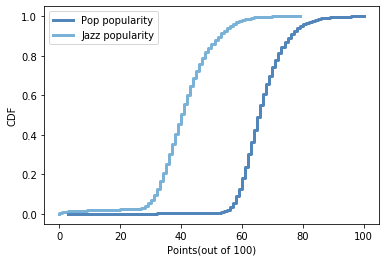

In [56]:
thinkplot.PrePlot(2)
thinkplot.Cdfs([pop_cdf, jazz_cdf])
thinkplot.Config(xlabel='Points(out of 100)', ylabel='CDF')

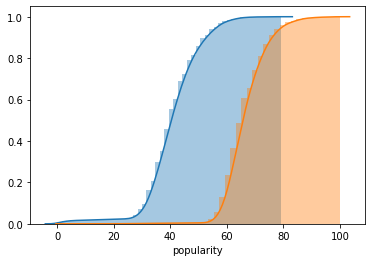

In [16]:
sns.distplot(Jazz_db.popularity,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
sns.distplot(Pop_db.popularity,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

Median is the 50th percentile.

In [64]:
pop_median = pop_cdf.Percentile(50)
pop_median

66

In [71]:
jazz_median = jazz_cdf.Percentile(50)
jazz_median

40

The interquartile range is the interval from the 25th to 75th percentile.

In [68]:
pop_iqr = (pop_cdf.Percentile(25), pop_cdf.Percentile(75))
pop_iqr

(62, 71)

In [70]:
jazz_iqr = (jazz_cdf.Percentile(25), jazz_cdf.Percentile(75))
jazz_iqr

(35, 46)

We can use the CDF to look up the percentile rank of a particular value.  For example, my favorite song was 67 at popularity rank, which is near the 61th percentile.

In [75]:
pop_cdf.PercentileRank(67)

60.53696995525251

That observation is the basis of `Cdf.Sample`, which generates a random sample from a Cdf.  Here's an example.

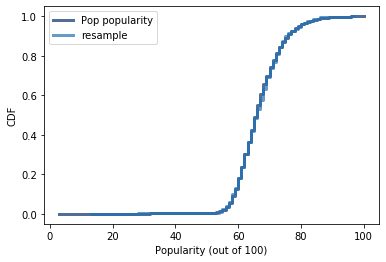

In [20]:
resample = pop_cdf.Sample(1000)
thinkplot.Cdf(pop_cdf)
thinkplot.Cdf(thinkstats2.Cdf(resample, label='resample'))
thinkplot.Config(xlabel='Popularity (out of 100)', ylabel='CDF')

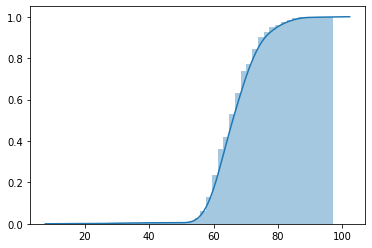

In [21]:
sns.distplot(resample,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

This confirms that the random sample has the same distribution as the original data.

How many people listen your's music too? Find persentile rank for your song with popularity 70 for Pop and Jazz 

In [82]:
# Solution

pop_cdf.PercentileRank(70)

74.40869379927551

In [83]:
# Solution

jazz_cdf.PercentileRank(70)

99.89407901705329